In [38]:
%matplotlib inline


What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

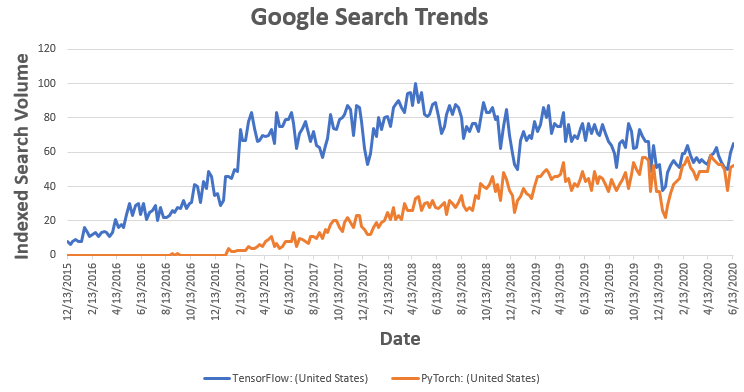

Getting Started
---------------
Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



In [39]:
from __future__ import print_function
import torch

<div class="alert alert-info"><h4>Note</h4><p>An uninitialized matrix is declared,
    but does not contain definite known
    values before it is used. When an
    uninitialized matrix is created,
    whatever values were in the allocated
    memory at the time will appear as the initial values.</p></div>



Construct a 5x3 matrix, uninitialized:



In [3]:
x = torch.empty(5, 3)
print(x)

tensor([[2.7467e+38, 3.0862e-41, 3.3631e-44],
        [0.0000e+00,        nan, 3.0862e-41],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 7.3924e+37]])


Construct a randomly initialized matrix:



In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6690, 0.6529, 0.8850],
        [0.3138, 0.8955, 0.1855],
        [0.7583, 0.0620, 0.3059],
        [0.3587, 0.4250, 0.9698],
        [0.9748, 0.5872, 0.3381]])


Construct a matrix filled zeros and of dtype long:



In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:



In [8]:
x = torch.tensor([5.5, 3])  # list를 바로 넣어줘도 됨 
print(x)

tensor([5.5000, 3.0000])


or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [9]:
x = torch.randn_like(x, dtype=torch.float)    # override dtype! x와 똑같은 크기를 만드는데 randn의 정규분포를 가지게 만들겠다
print(x)                                      # result has the same size

tensor([-0.1796, -1.6369])


Get its size:



In [15]:
x = torch.randn(3, 4, 5)
print(x.size())

torch.Size([3, 4, 5])


<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` is in fact a tuple, so it supports all tuple operations.</p></div>

There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1



In [16]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[1.0916, 1.4818, 0.3777],
        [0.7160, 0.9606, 1.0079],
        [1.1608, 1.5864, 0.8035],
        [0.2265, 1.4436, 1.6727],
        [0.8440, 1.1043, 1.9591]])


Addition: syntax 2



In [17]:
print(torch.add(x, y))

tensor([[1.0916, 1.4818, 0.3777],
        [0.7160, 0.9606, 1.0079],
        [1.1608, 1.5864, 0.8035],
        [0.2265, 1.4436, 1.6727],
        [0.8440, 1.1043, 1.9591]])


Addition: providing an output tensor as argument



In [18]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[1.0916, 1.4818, 0.3777],
        [0.7160, 0.9606, 1.0079],
        [1.1608, 1.5864, 0.8035],
        [0.2265, 1.4436, 1.6727],
        [0.8440, 1.1043, 1.9591]])


Addition: in-place



In [21]:
# adds x to y
print(y)
print(x+y)
y.add_(x)  # _ 언더바가 있으면 곧바로 바꿔줌 -> x를 더한값을 바로 y로 바꿔줌 
print(y)

tensor([[1.9709, 2.1375, 0.5187],
        [0.7726, 1.1281, 1.8950],
        [1.3911, 2.3583, 0.8459],
        [0.2322, 1.9386, 2.4695],
        [0.8849, 1.5510, 2.9202]])
tensor([[2.8503, 2.7932, 0.6597],
        [0.8292, 1.2957, 2.7822],
        [1.6215, 3.1302, 0.8883],
        [0.2378, 2.4337, 3.2662],
        [0.9257, 1.9977, 3.8812]])
tensor([[2.8503, 2.7932, 0.6597],
        [0.8292, 1.2957, 2.7822],
        [1.6215, 3.1302, 0.8883],
        [0.2378, 2.4337, 3.2662],
        [0.9257, 1.9977, 3.8812]])


<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

You can use standard NumPy-like indexing with all bells and whistles!



In [22]:
print(x[:, 1])

tensor([0.6557, 0.1676, 0.7719, 0.4951, 0.4467])


Resizing: If you want to resize/reshape tensor, you can use ``torch.view``:



In [25]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())
print(x)
print(y)
print(z)

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([[ 2.2481, -0.5175, -0.2379, -0.4088],
        [ 0.1625, -0.1248, -0.3237, -0.6498],
        [-1.0670,  0.0816,  1.0826,  0.8932],
        [ 1.0631, -0.0140,  1.3395,  0.6847]])
tensor([ 2.2481, -0.5175, -0.2379, -0.4088,  0.1625, -0.1248, -0.3237, -0.6498,
        -1.0670,  0.0816,  1.0826,  0.8932,  1.0631, -0.0140,  1.3395,  0.6847])
tensor([[ 2.2481, -0.5175, -0.2379, -0.4088,  0.1625, -0.1248, -0.3237, -0.6498],
        [-1.0670,  0.0816,  1.0826,  0.8932,  1.0631, -0.0140,  1.3395,  0.6847]])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [32]:
x = torch.randn(1)
print(x)
print(x.item())
print(type(x))
print(type(x.item()))

tensor([-0.3929])
-0.3928946852684021
<class 'torch.Tensor'>
<class 'float'>


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  `here <https://pytorch.org/docs/torch>`_.

NumPy Bridge
------------

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations (if the Torch Tensor is on CPU), and changing one will change
the other.

Converting a Torch Tensor to a NumPy Array



In [33]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [34]:
b = a.numpy()
print(b, type(b))

[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>


See how the numpy array changed in value.



In [35]:
a.add_(1)
print(a)
print(b)  # 

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Converting NumPy Array to Torch Tensor
--------------------------------------

See how changing the np array changed the Torch Tensor automatically



In [40]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.



In [41]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    x = x.cuda()                           # or jsut use the shortcut
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([0.6071], device='cuda:0')
tensor([0.6071], dtype=torch.float64)


In [42]:
# TODO: Compare computation time of the matrix multiplication A@B between CPU and GPU, where A is a 10000 x 10000 matrix and B is a 10000 x 5000 matrix.
import time

A = torch.randn(10000, 10000)
B = torch.randn(10000, 5000)
#================ YOUR CODE HERE ===================

start = time.time()
A @ B
end = time.time()
print('CPU: {} seconds'.format(end - start))

A = A.cuda()
B = B.cuda()
start = time.time()
A @ B
end = time.time()
print('GPU: {} seconds'.format(end - start))

#=================================================== 

CPU: 12.1522057056427 seconds
GPU: 0.009277820587158203 seconds
